In [1]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
data = pd.read_csv('Data/diabetes.csv')
data.head()

,pregnancies,glucose,diastolic,triceps,insulin,bmi,dpf,age,diabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
data['diabetes'].value_counts()

0    500
1    268
Name: diabetes, dtype: int64

In [4]:
data.isnull().sum().sum()

0

In [5]:
dtc = DecisionTreeClassifier()

In [6]:
diabetes = data['diabetes']
feature = data.drop('diabetes',1)

In [7]:
X_train,X_test,y_train,y_test = train_test_split(feature,diabetes,test_size=0.2,random_state=1111,stratify=feature)
X_test.shape

(154, 8)

In [8]:
cv = cross_val_score(dtc,X_train,y_train,cv=5)
cv

array([0.67479675, 0.71544715, 0.7398374 , 0.73170732, 0.63934426])

In [9]:
cv.mean()

0.700226576036252

In [10]:
dtc.fit(X_train,y_train)

DecisionTreeClassifier()

In [11]:
pred = dtc.predict(X_test)

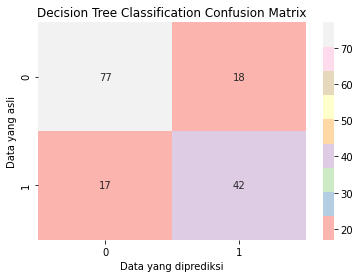

In [12]:
sns.heatmap(confusion_matrix(y_test,pred),annot=True,fmt='g',cmap='Pastel1')
plt.xlabel('Data yang diprediksi')
plt.ylabel('Data yang asli')
plt.title('Decision Tree Classification Confusion Matrix')
plt.show()

In [13]:
print(accuracy_score(y_test,pred))

0.7727272727272727


In [14]:
dtc.feature_importances_

array([0.06095859, 0.32565138, 0.10059756, 0.03249905, 0.05229307,
       0.16684935, 0.14782248, 0.11332853])

In [15]:
dtc.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'presort': 'deprecated',
 'random_state': None,
 'splitter': 'best'}

In [59]:
from sklearn.model_selection import GridSearchCV

param = {
    'criterion':['gini','entropy']
    'max_depth':[i for i in range(2,10)],
    'min_samples_split':[i for i in range(2,10)],
    'min_samples_leaf':[i for i in range(2,10)],
    'random_state':1
}
dtc_gs = GridSearchCV(dtc,param,cv=5)

In [60]:
dtc_gs.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [2, 3, 4, 5, 6, 7, 8, 9],
                         'min_samples_leaf': [2, 3, 4, 5, 6, 7, 8, 9],
                         'min_samples_split': [2, 3, 4, 5, 6, 7, 8, 9]})

In [61]:
dtc_gs.best_params_

{'max_depth': 4, 'min_samples_leaf': 9, 'min_samples_split': 6}

In [66]:
dtc_gs.best_score_

0.755684392909503

In [74]:
pred2 = dtc_gs.predict(X_test)

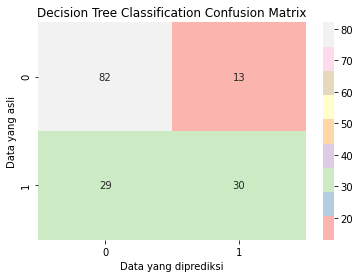

In [75]:
sns.heatmap(confusion_matrix(y_test,pred2),annot=True,fmt='g',cmap='Pastel1')
plt.xlabel('Data yang diprediksi')
plt.ylabel('Data yang asli')
plt.title('Decision Tree Classification Confusion Matrix')
plt.show()

In [76]:
print(accuracy_score(y_test,pred2))

0.7272727272727273
